In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("HR_comma_sep.csv")

In [2]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data['Department']=np.where(data['Department']=='support','technical',data['Department'])
data['Department']=np.where(data['Department']=='IT','technical',data['Department'])



In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0, 0.5, 'turn over frequency')

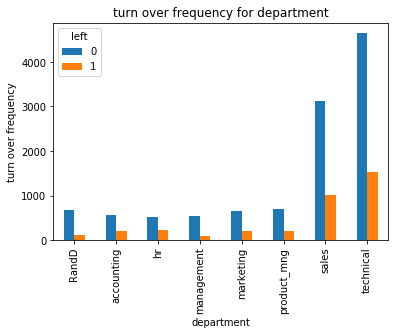

In [5]:
pd.crosstab(data.Department,data.left).plot(kind='bar')
plt.title('turn over frequency for department')
plt.xlabel('department')
plt.ylabel('turn over frequency')


Text(0, 0.5, 'portion of employee')

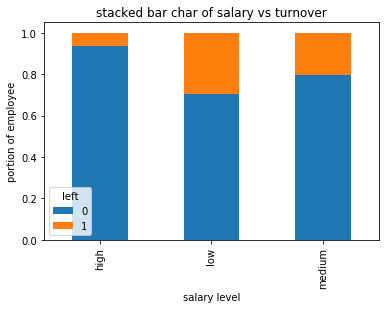

In [6]:
table=pd.crosstab(data.salary,data.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('stacked bar char of salary vs turnover')
plt.xlabel('salary level')
plt.ylabel('portion of employee')        

In [7]:
x=data.drop(['left'],axis=1)
y=data['left']
x.columns
type(x)

pandas.core.frame.DataFrame

In [8]:
x=x.values
y=y.values

In [9]:
x

array([[0.38, 0.53, 2, ..., 0, 'sales', 'low'],
       [0.8, 0.86, 5, ..., 0, 'sales', 'medium'],
       [0.11, 0.88, 7, ..., 0, 'sales', 'medium'],
       ...,
       [0.37, 0.53, 2, ..., 0, 'technical', 'low'],
       [0.11, 0.96, 6, ..., 0, 'technical', 'low'],
       [0.37, 0.52, 2, ..., 0, 'technical', 'low']], dtype=object)

In [10]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
x.shape

(14999, 9)

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('oh',OneHotEncoder(),[7,8])],remainder='passthrough')
x=ct.fit_transform(x)

In [13]:
import joblib
joblib.dump(ct,'column')

['column']

In [14]:
x

array([[0.0, 0.0, 0.0, ..., 3, 0, 0],
       [0.0, 0.0, 0.0, ..., 6, 0, 0],
       [0.0, 0.0, 0.0, ..., 4, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 3, 0, 0],
       [0.0, 0.0, 0.0, ..., 4, 0, 0],
       [0.0, 0.0, 0.0, ..., 3, 0, 0]], dtype=object)

In [15]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [18]:
import pickle
pickle.dump(sc,open('standscale.pkl','wb'))

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state = 7)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [20]:
rfpred = rf.predict(x_test)

In [21]:
rfpred


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
y_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
rfaccuracy = accuracy_score(y_test,rfpred)
rfcm = confusion_matrix(y_test,rfpred)

In [24]:
rfaccuracy

0.9893333333333333

In [25]:
import pickle
pickle.dump(rf,open('randomforest.pkl','wb'))


In [26]:
pwd

'C:\\Users\\jaswanth\\Downloads'

In [27]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
yp=rf.predict(sc.transform(ct.transform([[0.56,0.52,5,344,3,1,0,'sales','medium']])))

In [29]:
yp

array([1], dtype=int64)